# LAB DEEP LEARNING


### Load the modules and file_names

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from keras.regularizers import L2
file_name_train=".\YOGA\content\cleaned\DATASET\TRAIN"
file_name_test=".\YOGA\content\cleaned\DATASET\TEST"

via imagaDataGenerator load data from folders
we collected the data via the presented link
 and use data augmentation for better and more diverse dataset

In [21]:
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale = 1./255
    
   
)
train_generator = train_datagen.flow_from_directory(
    directory=file_name_train,
    target_size=(220,220), 
    color_mode='rgb', 
    batch_size=batch_size,        
    class_mode='categorical', 
    )

validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    file_name_test,
    target_size=(220,220), 
    color_mode='rgb', 
    batch_size=batch_size,        
    class_mode='categorical', 
)

Found 1069 images belonging to 5 classes.
Found 466 images belonging to 5 classes.


In [10]:
rev_dictionary = train_generator.class_indices
dictionary={}
for key,value in rev_dictionary.items():
    dictionary[value]=key

class_list = [value for _,value in dictionary.items()]
num_target=len(class_list)
print(">>> list_target:",class_list)
print(">>> number of target in dataset:",num_target)

>>> list_target: ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
>>> number of target in dataset: 5


In [16]:
####### DATA  VIEW ##########

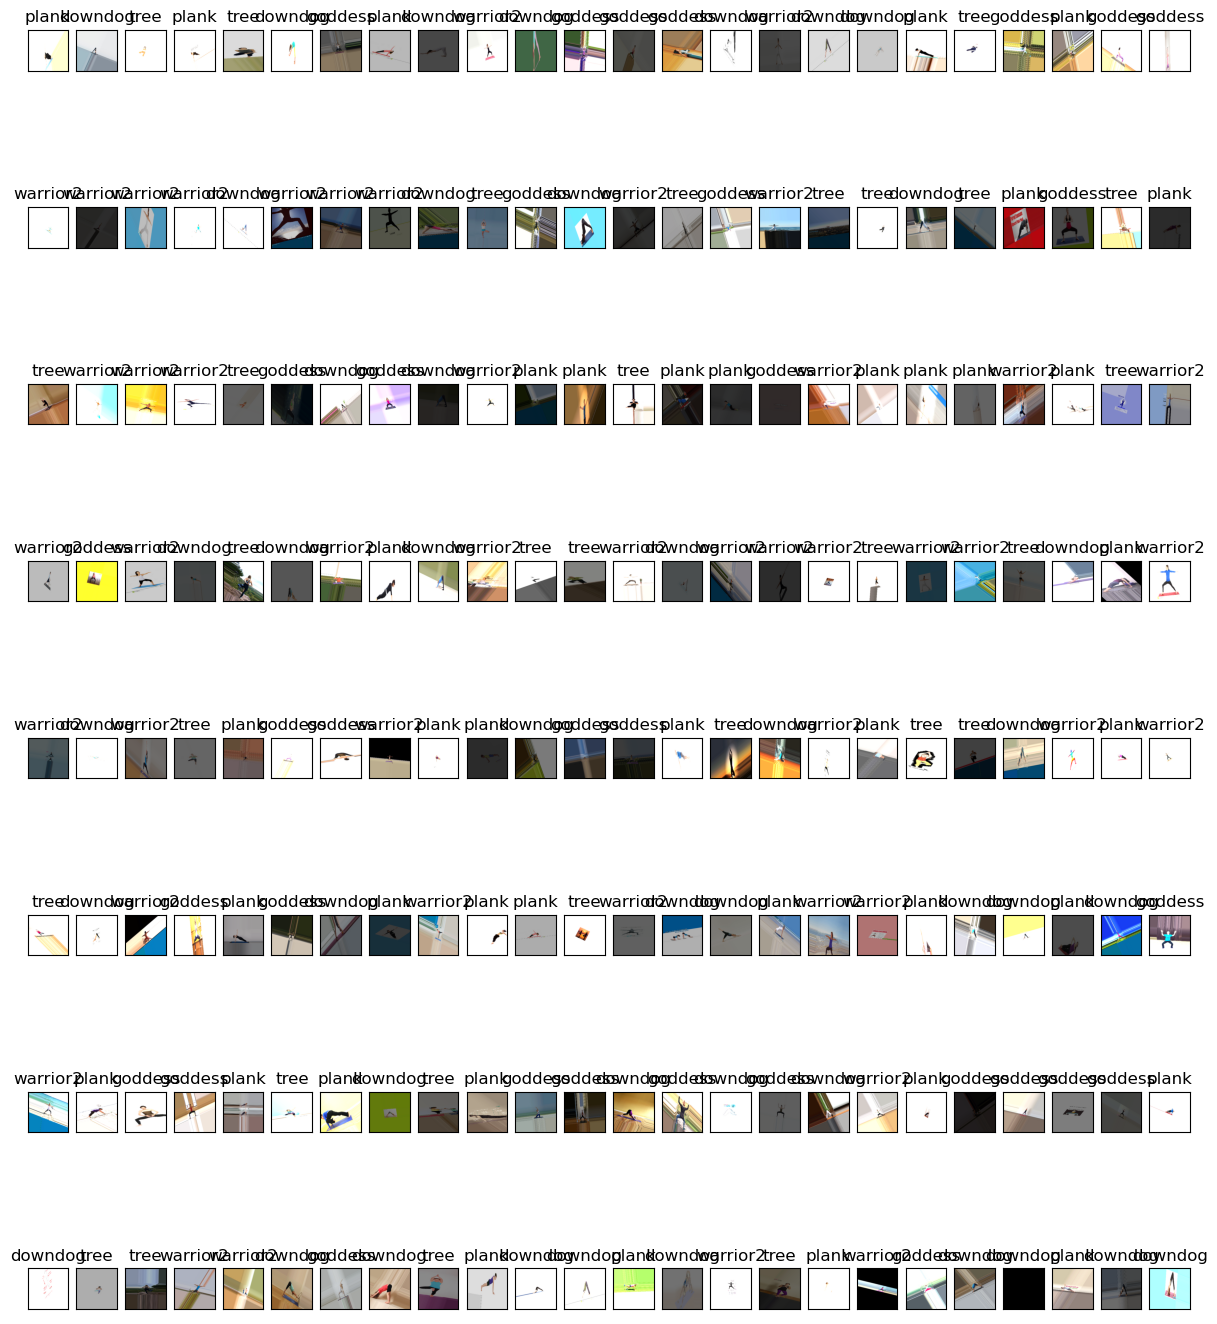

In [11]:

rows = 8
fig, axes = plt.subplots(rows,24)
for r in range(rows):    
    #---get the batch of augmented images---
    image_batch = train_generator.next()    
    #---get the number of images returned---
    images_count = image_batch[0].shape[0]
    
    for c in range(images_count):
        #---convert to unsigned integers for viewing---
        image = image_batch[0][c].astype('uint8')
        
        #---display the image---
        axes[r,c].imshow(image)
        #---display the label of the image---
        axes[r,c].title.set_text(
            class_list[np.argmax(image_batch[1][c])])
        #---hides the x and y-ticks---
        axes[r,c].set_xticks([])
        axes[r,c].set_yticks([])
fig.set_size_inches(15,18)   

# Create our model 
3 convolutional layers and only one hidden layer it give the most accurate results

we used regularizers L2

and stop_early function

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow import keras
from keras import layers
from keras.layers import Activation
from keras.regularizers import L2

IMG_SIZE = 220
EPOCHS = 10
BATCH_SIZE = 64
model = keras.models.Sequential([
	layers.Conv2D(filters=32,
				kernel_size=(5, 5),
				activation='relu',
				input_shape=(IMG_SIZE,
							IMG_SIZE,
							3),
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Conv2D(filters=64,
				kernel_size=(3, 3),
				activation='relu',
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Conv2D(filters=128,
				kernel_size=(3, 3),
				activation='relu',
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(312, activation='relu',activity_regularizer=L2(0.01)),
	layers.BatchNormalization(),

	layers.Dropout(0.3),
	layers.BatchNormalization(),
	layers.Dense(num_target, activation='softmax')
])

        
#---compile the model---    

model.summary()
#### stop function
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 55, 55, 128)       73856     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 27, 27, 128)    

In [57]:
keras.utils.plot_model(
	model,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [58]:
step_size_train = train_generator.n // train_generator.batch_size
model.compile(
	optimizer = 'adam',
	loss = 'categorical_crossentropy',
	metrics = ['accuracy']
)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)



In [59]:

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size = BATCH_SIZE,
                    epochs = 30,
                    verbose = 1,
                    callbacks=[stop_early]
                    )

Epoch 1/30
17/17 [==============================] - 108s 6s/step - loss: 3.5815 - accuracy: 0.3480 - val_loss: 1.5810 - val_accuracy: 0.2403
Epoch 2/30
17/17 [==============================] - 107s 6s/step - loss: 1.2256 - accuracy: 0.5594 - val_loss: 1.4887 - val_accuracy: 0.5129
Epoch 3/30
17/17 [==============================] - 108s 6s/step - loss: 0.8949 - accuracy: 0.7147 - val_loss: 1.4493 - val_accuracy: 0.5064
Epoch 4/30
17/17 [==============================] - 105s 6s/step - loss: 0.5563 - accuracy: 0.8494 - val_loss: 1.4193 - val_accuracy: 0.5258
Epoch 5/30
17/17 [==============================] - 109s 6s/step - loss: 0.3283 - accuracy: 0.9420 - val_loss: 1.3625 - val_accuracy: 0.6588
Epoch 6/30
17/17 [==============================] - 107s 6s/step - loss: 0.1773 - accuracy: 0.9775 - val_loss: 1.3125 - val_accuracy: 0.6137
Epoch 7/30
17/17 [==============================] - 106s 6s/step - loss: 0.1026 - accuracy: 0.9925 - val_loss: 1.2849 - val_accuracy: 0.6760
Epoch 8/30
17

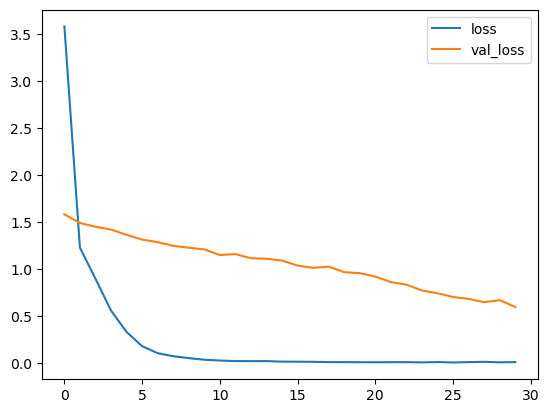

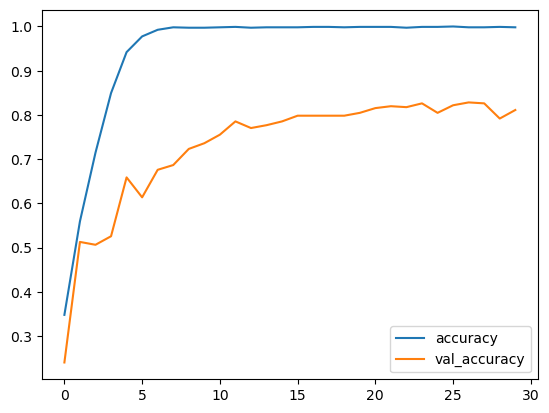

In [61]:
import pandas as pd
# Let’s visualize the training and validation accuracy with each epoch
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

## 5. Model Evaluation

In [77]:
pred=model.predict(validation_generator,verbose=1,steps=306/batch_size)
Y_pred = np.argmax(pred, axis=1)

4/4 [==============================] - 14s 3s/step


In [78]:
Y_pred

array([3, 4, 3, 2, 2, 3, 3, 1, 0, 3, 0, 0, 0, 1, 4, 1, 0, 1, 2, 3, 0, 4,
       4, 0, 3, 4, 2, 4, 0, 0, 3, 1, 2, 4, 0, 2, 1, 2, 0, 3, 0, 3, 1, 0,
       4, 4, 4, 2, 2, 4, 4, 0, 3, 1, 2, 3, 2, 1, 1, 2, 0, 4, 1, 1, 0, 1,
       1, 4, 3, 4, 3, 2, 2, 1, 2, 2, 1, 2, 4, 2, 1, 4, 1, 0, 0, 2, 1, 2,
       2, 4, 4, 0, 1, 3, 2, 1, 1, 0, 1, 4, 0, 2, 4, 4, 4, 3, 4, 4, 2, 1,
       2, 4, 0, 2, 0, 2, 2, 0, 0, 4, 2, 4, 1, 0, 4, 2, 4, 4, 2, 3, 1, 0,
       4, 4, 3, 0, 2, 2, 1, 2, 0, 0, 0, 3, 4, 4, 2, 2, 2, 2, 2, 1, 4, 2,
       4, 4, 2, 0, 3, 2, 4, 2, 1, 3, 0, 1, 0, 0, 0, 3, 2, 1, 2, 4, 3, 0,
       3, 3, 3, 1, 4, 0, 1, 0, 2, 2, 1, 3, 2, 2, 4, 4, 1, 2, 4, 4, 3, 2,
       4, 3, 2, 2, 1, 3, 2, 0, 2, 1, 4, 3, 4, 4, 4, 2, 4, 3, 2, 2, 3, 3,
       2, 0, 1, 4, 2, 2, 1, 2, 2, 0, 4, 2, 2, 1, 0, 4, 2, 4, 1, 4, 3, 3,
       4, 2, 0, 0, 4, 4, 2, 0, 0, 3, 2, 4, 3, 4, 4, 3, 0, 3, 2, 0, 2, 2,
       2, 4, 3, 2, 3, 3, 2, 2, 2, 2, 0, 2, 0, 0, 1, 4, 0, 4, 1, 4, 0, 3,
       0, 0, 2, 4, 1, 1, 0, 0, 1, 1, 2, 2, 4, 2, 2,

In [80]:
class_dict=train_generator.class_indices
labels= train_generator.labels
file_names= train_generator.filenames 

In [89]:
loss, acc = model.evaluate(validation_generator, verbose=1)
print(">>> Loss of model in the evaluation process:",loss)

print(">>> accuarcy =:",acc*100)

        

8/8 [==============================] - 20s 2s/step - loss: 0.5949 - accuracy: 0.8112
>>> Loss of model in the evaluation process: 0.5948846936225891
>>> accuarcy =: 81.11587762832642


## evaluate the data on different dataset

In [94]:
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale = 1./255
    
   
)
test_generator = train_datagen.flow_from_directory(
    directory="./added_data",
    target_size=(220,220), 
    color_mode='rgb', 
    batch_size=batch_size,        
    class_mode='categorical', 
    )

Found 121 images belonging to 5 classes.


In [95]:
loss, acc = model.evaluate(test_generator, verbose=1)
print(">>> Loss of model in the evaluation process:",loss)

print(">>> accuarcy =:",acc*100)

        

2/2 [==============================] - 8s 3s/step - loss: 1.1093 - accuracy: 0.6198
>>> Loss of model in the evaluation process: 1.109257459640503
>>> accuarcy =: 61.98347210884094
